## Importing neccesary libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

# Resume

This notebook aims to determine the potential of the teams qualified for the QATAR 2022 World Cup based on FIFA Ranking and also does some relevant analysis with the information.

In [2]:
df = pd.read_csv('datos/international_matches.csv', parse_dates=['date'])
df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

In [4]:
df.shape

(23921, 25)

In [5]:
df.isnull().sum()

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64

## Pre-Analysis

The dataset has a lot of blank fields that need to be fixed. However, before modifying any field, I want to analyze the teams' qualifications on the last FIFA date (June 2022). This is important because, from these qualifications, I will create the inference dataset that enters the machine learning algorithm that predicts the World Cup matches.

### Top 10 FIFA Ranking

In [6]:
fifa_rank = df[['date','home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank']]
home = fifa_rank[['date', 'home_team', 'home_team_fifa_rank']].rename(columns={"home_team":"team", "home_team_fifa_rank":"rank"})
away = fifa_rank[['date', 'away_team', 'away_team_fifa_rank']].rename(columns={"away_team":"team", "away_team_fifa_rank":"rank"})
fifa_rank = pd.concat([home, away])
#Select each country latest match
fifa_rank = fifa_rank.sort_values(['team', 'date'], ascending=[True, False])
last_rank = fifa_rank
fifa_rank_top10 = fifa_rank.groupby('team').first().sort_values('rank', ascending=True)[0:10].reset_index()
fifa_rank_top10

,team,date,rank
0,Brazil,2022-06-06,1
1,Belgium,2022-06-14,2
2,France,2022-06-13,3
3,Argentina,2022-06-05,4
4,England,2022-06-14,5
5,Italy,2022-06-14,6
6,Spain,2022-06-12,7
7,Portugal,2022-06-12,8
8,Mexico,2022-06-14,9
9,Netherlands,2022-06-14,10


## Top 10 attacking teams in the last FIFA date

In [7]:

fifa_offense = df[['date', 'home_team', 'away_team', 'home_team_mean_offense_score', 'away_team_mean_offense_score']]
home = fifa_offense[['date', 'home_team', 'home_team_mean_offense_score']].rename(columns={"home_team":"team", "home_team_mean_offense_score":"offense_score"})
away = fifa_offense[['date', 'away_team', 'away_team_mean_offense_score']].rename(columns={"away_team":"team", "away_team_mean_offense_score":"offense_score"})
fifa_offense = pd.concat([home, away])
fifa_offense = fifa_offense.sort_values(['date', 'team'],ascending=[False, True])
last_offense = fifa_offense
fifa_offense_top10 = fifa_offense.groupby('team').first().sort_values('offense_score', ascending=False)[0:10].reset_index()
fifa_offense_top10

,team,date,offense_score
0,Argentina,2022-06-05,89.0
1,France,2022-06-13,88.3
2,England,2022-06-14,88.0
3,Brazil,2022-06-06,86.3
4,Portugal,2022-06-12,86.0
5,Belgium,2022-06-14,85.7
6,Italy,2022-06-14,85.3
7,Spain,2022-06-12,85.0
8,Poland,2022-06-14,84.7
9,Uruguay,2022-06-11,84.3


## Top 10 Midfield teams in the last FIFA date

In [8]:

fifa_midfield = df[['date', 'home_team', 'away_team', 'home_team_mean_midfield_score', 'away_team_mean_midfield_score']]
home = fifa_midfield[['date', 'home_team', 'home_team_mean_midfield_score']].rename(columns={"home_team":"team", "home_team_mean_midfield_score":"midfield_score"})
away = fifa_midfield[['date', 'away_team', 'away_team_mean_midfield_score']].rename(columns={"away_team":"team", "away_team_mean_midfield_score":"midfield_score"})
fifa_midfield = pd.concat([home,away])
fifa_midfield = fifa_midfield.sort_values(['date','team'],ascending=[False,True])
last_midfield = fifa_midfield
fifa_midfield_top10 = fifa_midfield.groupby('team').first().sort_values('midfield_score',ascending=False)[0:10].reset_index()
fifa_midfield_top10

,team,date,midfield_score
0,Germany,2022-06-14,87.8
1,France,2022-06-13,86.8
2,Spain,2022-06-12,86.0
3,Belgium,2022-06-14,85.5
4,Brazil,2022-06-06,85.5
5,Portugal,2022-06-12,84.5
6,Italy,2022-06-14,84.5
7,Croatia,2022-06-13,84.2
8,England,2022-06-14,84.0
9,Argentina,2022-06-05,84.0


## Top 10 defending teams in the last FIFA date


In [9]:
fifa_defense = df[['date', 'home_team', 'away_team', 'home_team_mean_defense_score', 'away_team_mean_defense_score']]
home = fifa_defense[['date', 'home_team', 'home_team_mean_defense_score']].rename(columns={"home_team":"team", "home_team_mean_defense_score":"defense_score"})
away = fifa_defense[['date', 'away_team', 'away_team_mean_defense_score']].rename(columns={"away_team":"team", "away_team_mean_defense_score":"defense_score"})
fifa_defense = pd.concat([home, away])
fifa_defense = fifa_defense.sort_values(['date', 'team'],ascending=[False, True])
last_defense = fifa_defense 
fifa_defense_top10 = fifa_defense.groupby('team').first().sort_values('defense_score', ascending = False)[0:10].reset_index()
fifa_defense_top10

,team,date,defense_score
0,Spain,2022-06-12,86.5
1,Portugal,2022-06-12,85.2
2,Netherlands,2022-06-14,85.2
3,England,2022-06-14,85.0
4,Brazil,2022-06-06,84.8
5,Italy,2022-06-14,84.2
6,France,2022-06-13,84.2
7,Germany,2022-06-14,84.0
8,Argentina,2022-06-05,82.2
9,Uruguay,2022-06-11,81.2


## Filter the teams participating in QATAR - World cup 2022

In [10]:
list_2022 = ['Qatar', 'Germany', 'Denmark', 'Brazil', 'France', 'Belgium', 'Croatia', 'Spain', 'Serbia', 'England', 'Switzerland', 'Netherlands', 'Argentina', 'IR Iran', 'Korea Republic', 'Japan', 'Saudi Arabia', 'Ecuador', 'Uruguay', 'Canada', 'Ghana', 'Senegal', 'Portugal', 'Poland', 'Tunisia', 'Morocco', 'Cameroon', 'USA', 'Mexico', 'Wales', 'Australia', 'Costa Rica']
final_df = df[(df["home_team"].apply(lambda x: x in list_2022)) | (df["away_team"].apply(lambda x: x in list_2022))]

In [11]:
final_df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1993-08-11,Sweden,Switzerland,Europe,Europe,4,3,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Creating the training set

In [12]:
ok_df = final_df

In [13]:
final_df.shape

(9321, 25)

In [14]:
final_df['home_team_result'] = final_df['home_team_result'].map({'Win':1, 'Draw':2, 'Lose':0})

In [15]:
# Adjusting some NA values to place the mean for every country
final_df['home_team_goalkeeper_score'] = round(final_df.groupby("home_team")["home_team_goalkeeper_score"].transform(lambda x: x.fillna(x.mean())))
final_df['away_team_goalkeeper_score'] = round(final_df.groupby("away_team")["away_team_goalkeeper_score"].transform(lambda x: x.fillna(x.mean())))

final_df['home_team_mean_defense_score'] = round(final_df.groupby('home_team')['home_team_mean_defense_score'].transform(lambda x : x.fillna(x.mean())))
final_df['away_team_mean_defense_score'] = round(final_df.groupby('away_team')['away_team_mean_defense_score'].transform(lambda x : x.fillna(x.mean())))

final_df['home_team_mean_midfield_score'] = round(final_df.groupby('home_team')['home_team_mean_midfield_score'].transform(lambda x : x.fillna(x.mean())))
final_df['away_team_mean_midfield_score'] = round(final_df.groupby('away_team')['away_team_mean_midfield_score'].transform(lambda x : x.fillna(x.mean())))

final_df['home_team_mean_offense_score'] = round(final_df.groupby('home_team')['home_team_mean_offense_score'].transform(lambda x : x.fillna(x.mean())))
final_df['away_team_mean_offense_score'] = round(final_df.groupby('away_team')['away_team_mean_offense_score'].transform(lambda x : x.fillna(x.mean())))

In [16]:
# There are some teams for which we have no stats on FIFA dataset, so they are not less than average performing teams, so giving a average score of 60 for all.
final_df.fillna(65,inplace=True)

In [17]:
final_df = final_df.drop(['date', 'home_team_continent', 'away_team_continent', 
               'home_team_score', 'away_team_score', 'tournament', 'city', 
               'country', 'neutral_location', 'shoot_out'],axis=1)

In [18]:
# Change column names
final_df.rename(columns={"home_team":"Team1", "away_team":"Team2", "home_team_fifa_rank":"Team1_FIFA_RANK", 
                         'home_team_total_fifa_points':'Team1_fifapoints', 'away_team_total_fifa_points':'Team2_fifapoints',
                         "away_team_fifa_rank":"Team2_FIFA_RANK", "home_team_result":"Team1_Result", "home_team_goalkeeper_score":"Team1_Goalkeeper_Score",
                        "away_team_goalkeeper_score":"Team2_Goalkeeper_Score", "home_team_mean_defense_score":"Team1_Defense",
                        "home_team_mean_offense_score":"Team1_Offense", "home_team_mean_midfield_score":"Team1_Midfield",
                        "away_team_mean_defense_score":"Team2_Defense", "away_team_mean_offense_score":"Team2_Offense",
                        "away_team_mean_midfield_score":"Team2_Midfield"}, inplace=True)

In [19]:
final_df.head()

,Team1,Team2,Team1_FIFA_RANK,Team2_FIFA_RANK,Team1_fifapoints,Team2_fifapoints,Team1_Result,Team1_Goalkeeper_Score,Team2_Goalkeeper_Score,Team1_Defense,Team1_Offense,Team1_Midfield,Team2_Defense,Team2_Offense,Team2_Midfield
0,Bolivia,Uruguay,59,22,0,0,1,67.0,79.0,67.0,68.0,68.0,80.0,83.0,79.0
1,Brazil,Mexico,8,14,0,0,2,86.0,79.0,86.0,86.0,85.0,77.0,79.0,78.0
2,Ecuador,Venezuela,35,94,0,0,1,71.0,68.0,71.0,75.0,75.0,73.0,75.0,74.0
4,Paraguay,Argentina,67,5,0,0,0,74.0,81.0,75.0,78.0,75.0,83.0,88.0,85.0
9,Sweden,Switzerland,4,3,0,0,0,76.0,81.0,77.0,82.0,78.0,78.0,76.0,79.0


In [20]:
final_df['Team1_fifapoints'].value_counts()

0       5763
713       13
324       12
924       11
1555      11
        ... 
266        1
326        1
553        1
738        1
854        1
Name: Team1_fifapoints, Length: 1310, dtype: int64

In [21]:
final_df.shape

(9321, 15)

#### Relevant comment. On above dataset, we have a lot of missing values on the fifapoints columns. 

- This is an important variable since it determines differences between teams. 

- We will begin our analysis from when the fifapoints started to be considered. 

In [22]:
final_df = final_df.tail(3558)

In [23]:
final_df

,Team1,Team2,Team1_FIFA_RANK,Team2_FIFA_RANK,Team1_fifapoints,Team2_fifapoints,Team1_Result,Team1_Goalkeeper_Score,Team2_Goalkeeper_Score,Team1_Defense,Team1_Offense,Team1_Midfield,Team2_Defense,Team2_Offense,Team2_Midfield
14274,Bahrain,Qatar,101,88,325,364,2,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0
14276,Bulgaria,England,51,4,585,1176,0,80.0,83.0,71.0,74.0,74.0,84.0,81.0,86.0
14277,Canada,St. Lucia,102,184,319,54,1,77.0,65.0,68.0,70.0,76.0,65.0,65.0,65.0
14279,Cyprus,Portugal,76,8,426,1059,0,64.0,81.0,67.0,70.0,66.0,82.0,86.0,82.0
14281,Ecuador,Jamaica,66,43,491,622,1,69.0,63.0,70.0,75.0,77.0,65.0,72.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23908,Netherlands,Wales,10,18,1658,1588,1,81.0,74.0,85.0,83.0,84.0,75.0,73.0,78.0
23909,Poland,Belgium,26,2,1544,1827,0,87.0,89.0,75.0,85.0,76.0,81.0,86.0,86.0
23918,Chile,Ghana,28,60,1526,1387,0,79.0,74.0,76.0,77.0,78.0,76.0,76.0,78.0
23919,Japan,Tunisia,23,35,1553,1499,0,73.0,64.0,75.0,75.0,78.0,71.0,72.0,74.0


In [24]:
final_df.to_csv('datos/training_set.csv')

## Stats after Russia 2018

Information to be considered on our analysis. We will consider all results since 2018, which is the date teams use to begin to prepare for the world cup reconstructing their teams.

In [25]:
new_df = ok_df[ok_df['date']>'2018-07-01']
new_df.shape

(1247, 25)

In [26]:
new_df.isnull().sum()

date                             0
home_team                        0
away_team                        0
home_team_continent              0
away_team_continent              0
home_team_fifa_rank              0
away_team_fifa_rank              0
home_team_total_fifa_points      0
away_team_total_fifa_points      0
home_team_score                  0
away_team_score                  0
tournament                       0
city                             0
country                          0
neutral_location                 0
shoot_out                        0
home_team_result                 0
home_team_goalkeeper_score       0
away_team_goalkeeper_score       0
home_team_mean_defense_score     0
home_team_mean_offense_score     0
home_team_mean_midfield_score    0
away_team_mean_defense_score     0
away_team_mean_offense_score     0
away_team_mean_midfield_score    0
dtype: int64

In [27]:
new_df.dropna(inplace=True)

In [28]:
new_df.isnull().sum()

date                             0
home_team                        0
away_team                        0
home_team_continent              0
away_team_continent              0
home_team_fifa_rank              0
away_team_fifa_rank              0
home_team_total_fifa_points      0
away_team_total_fifa_points      0
home_team_score                  0
away_team_score                  0
tournament                       0
city                             0
country                          0
neutral_location                 0
shoot_out                        0
home_team_result                 0
home_team_goalkeeper_score       0
away_team_goalkeeper_score       0
home_team_mean_defense_score     0
home_team_mean_offense_score     0
home_team_mean_midfield_score    0
away_team_mean_defense_score     0
away_team_mean_offense_score     0
away_team_mean_midfield_score    0
dtype: int64

In [29]:
new_df.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

In [30]:
away_team_result = []
for row in new_df['home_team_result']:
    if row == 'Draw':
        away_team_result.append('Draw')
    elif row == 'Win':
        away_team_result.append('Lose')
    else:
        away_team_result.append('Win')

new_df['away_team_result'] = away_team_result

In [31]:
new_df[['home_team_result', 'away_team_result']]

,home_team_result,away_team_result
20437,1,Win
20438,1,Win
20439,1,Win
20440,0,Win
20442,0,Win
...,...,...
23908,1,Win
23909,0,Win
23918,0,Win
23919,0,Win


In [32]:
new_df['away_team_result'] = new_df['away_team_result'].map({'Win':1, 'Draw':2, 'Lose':0})

In [33]:
ok_df = new_df[['date', 'home_team', 'away_team', 'home_team_score', 
       'away_team_score', 'home_team_result', 'away_team_result', 'tournament', 
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score']]

In [34]:
def historial(country):
    hometeam = ok_df[(ok_df['home_team'] == country)]
    awayteam = ok_df[(ok_df['away_team'] == country)]
    home_team = hometeam[['date', 'home_team', 'home_team_result', 'tournament', 'home_team_goalkeeper_score',
            'home_team_mean_defense_score', 'home_team_mean_midfield_score', 
            'home_team_mean_offense_score']].rename(columns={'home_team':'team',
                                                             'home_team_result':'result',
                                                             'home_team_goalkeeper_score':'GK_score',
                                                             'home_team_mean_defense_score':'def_score',
                                                             'home_team_mean_midfield_score':'mid_score',
                                                             'home_team_mean_offense_score': 'off_score'})


    away_team = awayteam[['date', 'away_team', 'away_team_result', 'tournament', 'away_team_goalkeeper_score',
                'away_team_mean_defense_score', 'away_team_mean_midfield_score', 
                'away_team_mean_offense_score']].rename(columns={'away_team':'team',
                                                                 'away_team_result':'result',
                                                                 'away_team_goalkeeper_score':'GK_score',
                                                                 'away_team_mean_defense_score':'def_score',
                                                                 'away_team_mean_midfield_score':'mid_score',
                                                                 'away_team_mean_offense_score': 'off_score'})
    return pd.concat([home_team, away_team])

def grafico(country):
    colors = ['red', 'green', 'lightyellow']
    team.groupby('result').count().plot(kind='pie', y='team', colors=colors, autopct='%1.0f%%')
    plt.title('Results since Russia 2018 for '+country)
    labels = [r'Loss', r'Win', r'Draw']
    plt.legend(labels)

Here you can select a country, and it will provide the historical since last world cup (2018)

In [35]:
country = 'Uruguay'
team = historial(country)
team

,date,team,result,tournament,GK_score,def_score,mid_score,off_score
20442,2018-07-06,Uruguay,0,FIFA World Cup,82.0,82.0,78.0,85.0
21154,2019-06-07,Uruguay,1,Friendly,81.0,84.0,78.0,87.0
21241,2019-06-16,Uruguay,1,Copa América,81.0,84.0,78.0,87.0
21261,2019-06-20,Uruguay,2,Copa América,81.0,84.0,78.0,87.0
21309,2019-06-29,Uruguay,0,Copa América,81.0,84.0,78.0,87.0
21655,2019-10-11,Uruguay,1,Friendly,81.0,84.0,81.0,86.0
22060,2020-10-08,Uruguay,1,FIFA World Cup qualification,82.0,82.0,81.0,82.0
22252,2020-11-17,Uruguay,0,FIFA World Cup qualification,82.0,82.0,81.0,82.0
22523,2021-06-03,Uruguay,2,FIFA World Cup qualification,82.0,82.0,81.0,82.0
22720,2021-06-21,Uruguay,2,Copa América,82.0,82.0,81.0,82.0


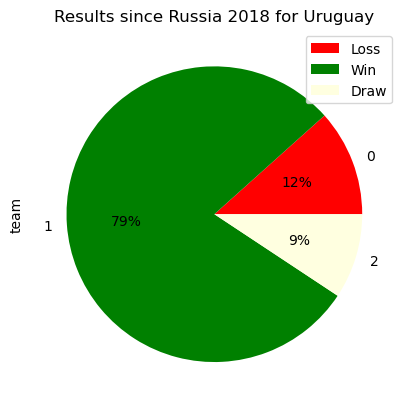

In [36]:
grafico(country)

In [37]:
final_dataframe = pd.DataFrame()
for team in list_2022:
    calc = historial(team)
    final_dataframe = pd.concat([final_dataframe, calc.tail(1)])
    final_dataframe = final_dataframe[['date', 'team', 'GK_score', 'def_score', 'mid_score', 'off_score']]

In [38]:
final_dataframe

,date,team,GK_score,def_score,mid_score,off_score
23237,2021-11-14,Qatar,65.0,65.0,65.0,65.0
23852,2022-06-11,Germany,90.0,84.0,88.0,83.0
23752,2022-06-06,Denmark,85.0,80.0,80.0,78.0
23760,2022-06-06,Brazil,89.0,85.0,86.0,86.0
23826,2022-06-10,France,87.0,84.0,87.0,88.0
23909,2022-06-14,Belgium,89.0,81.0,86.0,86.0
23885,2022-06-13,Croatia,82.0,78.0,84.0,77.0
23811,2022-06-09,Spain,84.0,86.0,86.0,85.0
23869,2022-06-12,Serbia,80.0,76.0,82.0,80.0
23769,2022-06-07,England,83.0,85.0,84.0,88.0


### Taking information which comes from the official FIFA ranking webpage

- This database determines the country´s ranking per lot of variables, mainly last international matches. This is the reason why we take this information instead of manually doing calculations on the international matches database. This FIFA ranking already contemplates it.

- For more information on this, please check the element called "FIFA Rankings calculation" present on my Github.

In [39]:
rankings = pd.read_excel('datos/fifa_rankings.xlsx')
rankings

,RK,Team,Total Points
0,1,Brazil,1841.30
1,2,Belgium,1816.71
2,3,Argentina,1773.88
3,4,France,1759.78
4,5,England,1728.47
...,...,...,...
95,96,Vietnam,1226.65
96,97,Belarus,1221.06
97,98,Equatorial Guinea,1215.66
98,99,Lebanon,1211.71


In [40]:
final_rankings = rankings[(rankings["Team"].apply(lambda x: x in list_2022))]
final_rankings.shape

(32, 3)

### Joining the two databases

In [41]:
final_ok = final_dataframe.merge(final_rankings, left_on='team', right_on='Team')
final_ok = final_ok[['team', 'RK', 'Total Points', 'GK_score', 'def_score', 'mid_score', 'off_score']].sort_values('RK')
final_ok

,team,RK,Total Points,GK_score,def_score,mid_score,off_score
3,Brazil,1,1841.30,89.0,85.0,86.0,86.0
5,Belgium,2,1816.71,89.0,81.0,86.0,86.0
12,Argentina,3,1773.88,84.0,82.0,84.0,89.0
4,France,4,1759.78,87.0,84.0,87.0,88.0
9,England,5,1728.47,83.0,85.0,84.0,88.0
7,Spain,7,1715.22,84.0,86.0,86.0,85.0
11,Netherlands,8,1694.51,81.0,85.0,84.0,83.0
22,Portugal,9,1676.56,82.0,85.0,84.0,86.0
2,Denmark,10,1666.57,85.0,80.0,80.0,78.0
1,Germany,11,1650.21,90.0,84.0,88.0,83.0


In [42]:
final_ok.shape

(32, 7)

If Qatar is missing, delete """´s from code below. Otherwise, disregard.

In [43]:
"""qatar = rankings[rankings['Team'] == 'Qatar']
qatar"""

"qatar = rankings[rankings['Team'] == 'Qatar']\nqatar"

In [44]:
"""qatar['GK_score'] = 70
qatar['def_score'] = 70
qatar['mid_score'] = 70
qatar['off_score'] = 70
qatar = qatar.rename(columns={'Team':'team'})
qatar = qatar[['team', 'RK', 'Total Points', 'GK_score', 'def_score', 'mid_score', 'off_score']]"""

"qatar['GK_score'] = 70\nqatar['def_score'] = 70\nqatar['mid_score'] = 70\nqatar['off_score'] = 70\nqatar = qatar.rename(columns={'Team':'team'})\nqatar = qatar[['team', 'RK', 'Total Points', 'GK_score', 'def_score', 'mid_score', 'off_score']]"

In [45]:
"""final_ok = pd.concat([final_ok, qatar]).sort_values('RK')
final_ok"""

"final_ok = pd.concat([final_ok, qatar]).sort_values('RK')\nfinal_ok"

## Exporting final dataframe to CSV format

In [46]:
final_ok.to_csv('datos/team_scores.csv', index=False)